In [10]:
# 240816(3)

### 목표
- 선형회귀이론 및 선형회귀 모델 이해
- Lenier Model 을 활용하여 집값을 예측해보자!

- 데이터 로드

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 경고창 무시
import warnings
warnings.filterwarnings('ignore')

In [14]:
house_data = pd.read_csv('./data/melb_data.csv')

In [15]:
# 데이터 읽어오기
house_data

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [16]:
# 데이터 정보 확인
house_data.info()
# 결측치 확인 가능 (기계학습 시 결측치가 있으면 학습xxxx)
# Dtype 확인 (범주형, 문자열 형태의 데이터는 학습이 안됨 -> 수치형으로 변경 : 인코딩)
# Price 컬럼 : 정답컬럼(주택가격)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

Suburb: 주택이 위치한 교외 지역의 이름  
Address: 주택의 주소  
Rooms: 주택의 방 개수  
Type: 주택 유형 (h: 주택, u: 유닛, t: 타운하우스)  
Price: 주택 가격  
Method: 판매 방법 (S: 매매, SP: 매매 후 가격 공개, PI: 경매 전에 가격, VB: 경매 후 가격 공개)  
SellerG: 판매 대행 부동산 중개인의 이름  
Date: 판매 날짜  
Distance: 주택이 CBD (중심 업무 지구)에서 떨어진 거리 (킬로미터 단위)  
Postcode: 우편번호  
Bedroom2: 주택의 침실 개수 (2개의 침실을 갖춘 주택)  
Bathroom: 주택의 욕실 개수  
Car: 주차 가능한 자동차 수  
Landsize: 대지 면적 (평방 미터 단위)  
BuildingArea: 건축 면적 (평방 미터 단위)  
YearBuilt: 주택이 건축된 연도  
CouncilArea: 관할 구역  
Lattitude: 주택의 위도  
Longtitude: 주택의 경도  
Regionname: 지역 이름  
Propertycount: 지역 내의 부동산 개수  

In [18]:
# 결측치가 있는 특성 확인
# True ==1, False == 0 -> 다 더하면 결측치 개수 확인 가능
house_data.isnull().sum().sort_values(ascending =False)

BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Car                62
Suburb              0
Bathroom            0
Regionname          0
Longtitude          0
Lattitude           0
Landsize            0
Bedroom2            0
Address             0
Postcode            0
Distance            0
Date                0
SellerG             0
Method              0
Price               0
Type                0
Rooms               0
Propertycount       0
dtype: int64

In [19]:
True ==1

True

In [20]:
False == 0

True

### EDA 탐색적데이터 분석
- 기술통계량 확인, 시각화

In [22]:
# 기술통계량 확인
house_data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [23]:
# 240816(4)

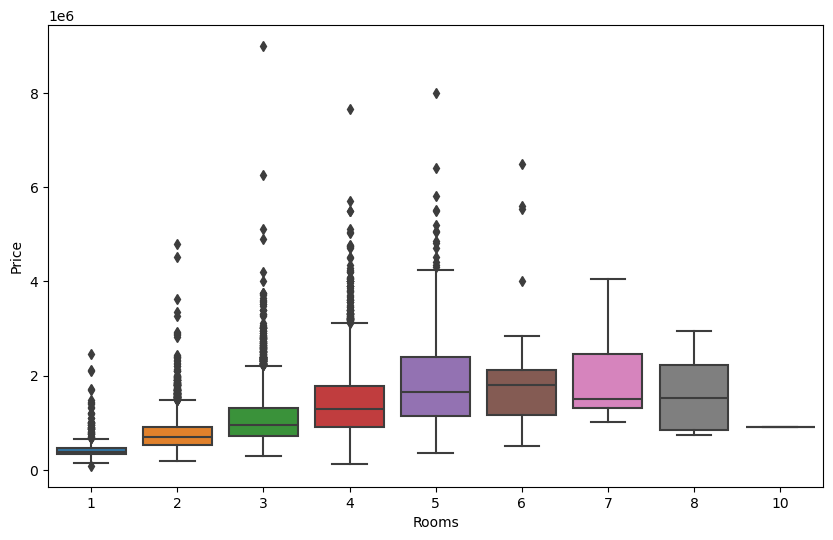

In [24]:
# Rooms - 방의 개수에 따른 주택가격의 분포현황
plt.figure(figsize=(10,6))
sns.boxplot(x="Rooms", y="Price", data=house_data)
plt.show()
# 방 개수가 증가할수록 주택 가격의 중앙값 상승
# 하지만 방 6개 이상은 큰 의미가 없어보임
# 이상치 확인 가능

In [25]:
# Type특성의 데이터 종류
house_data['Type'].unique() # 자 : 중복없이 데이터의 종류 확인 가능

array(['h', 'u', 't'], dtype=object)

In [26]:
# # 타입별로 주택 평균가격 확인
# house_data[['Type', 'Price']].groupby('Type').mean().plot(kind='bar')

In [27]:
# # 위도와 가격에 따른 밀도 확인
# # kdeplot - 커널밀도추정 그래프
# plt.figure(figsize=(10,6))
# plt.title("Ked plot of Lattitude vs Price")
# sns.kdeplot(data=house_data, x="Lattitude", y="Price", fill=True)
# plt.show()

In [28]:
# # 위도와 가격에 따른 밀도 확인
# # scatterplot - 산점도
# plt.figure(figsize=(10,6))
# plt.title("Ked plot of Lattitude vs Price")
# sns.scatterplot(data=house_data, x="Lattitude", y="Price")
# plt.show()

In [29]:
# # 경도와 가격에 따른 밀도 확인
# # kdeplot - 커널밀도추정 그래프
# plt.figure(figsize=(10,6))
# plt.title("Ked plot of Longtitude vs Price")
# sns.kdeplot(data=house_data, x="Longtitude", y="Price", fill=True)
# plt.show()

In [30]:
# # 위도와 경도에따른 주택 밀집 정도 확인 (어떤 위치에 주택들이 모여있는지)
# plt.figure(figsize=(10,6))
# plt.title("Ked plot of Lattitude and Longtitude")
# sns.kdeplot(data=house_data, x="Lattitude", y="Longtitude", fill=True)
# plt.show()

In [31]:
# Councilarea 값 확인 ( 종류 확인)
house_data['CouncilArea'].unique()


array(['Yarra', 'Moonee Valley', 'Port Phillip', 'Darebin', 'Hobsons Bay',
       'Stonnington', 'Boroondara', 'Monash', 'Glen Eira', 'Whitehorse',
       'Maribyrnong', 'Bayside', 'Moreland', 'Manningham', 'Banyule',
       'Melbourne', 'Kingston', 'Brimbank', 'Hume', nan, 'Knox',
       'Maroondah', 'Casey', 'Melton', 'Greater Dandenong', 'Nillumbik',
       'Whittlesea', 'Frankston', 'Macedon Ranges', 'Yarra Ranges',
       'Wyndham', 'Cardinia', 'Unavailable', 'Moorabool'], dtype=object)

In [32]:
len(house_data['CouncilArea'].unique()) # 자: 관활구역 34개

34

<Axes: xlabel='count', ylabel='CouncilArea'>

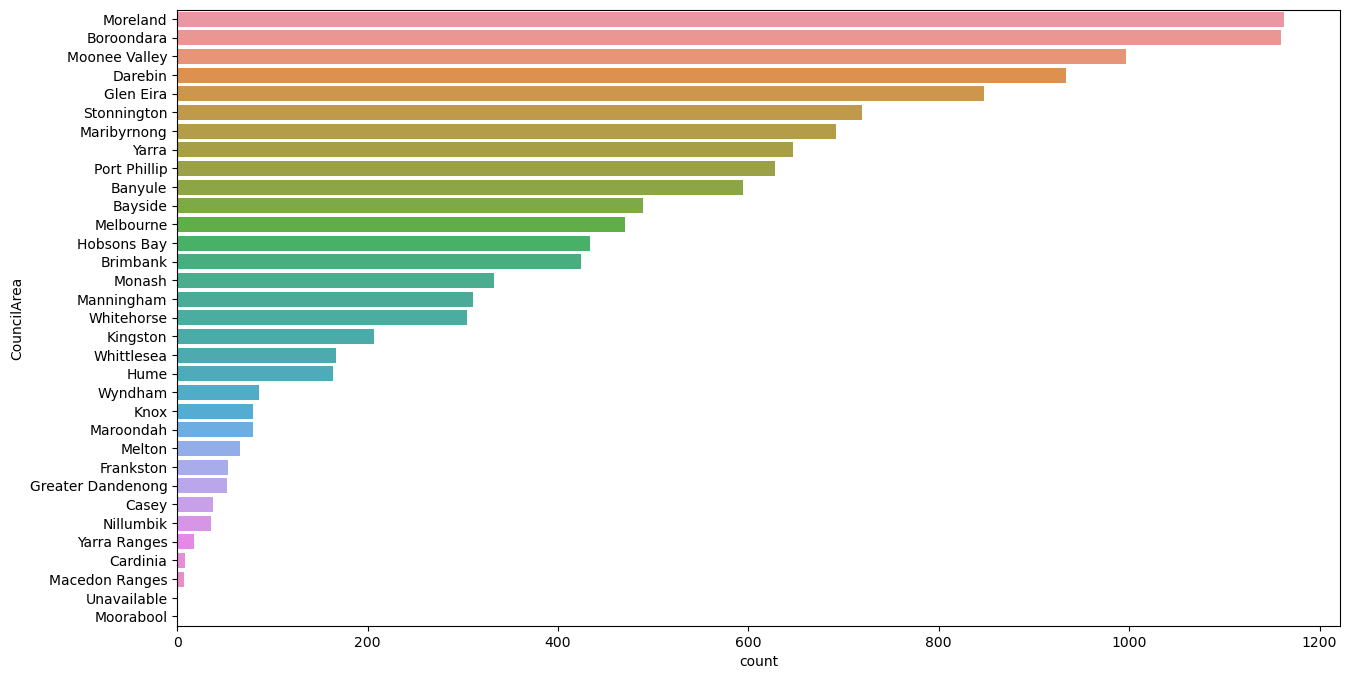

In [33]:
# 관할구역별 주택 수 분포 확인
plt.figure(figsize=(15,8))
sns.countplot(y= 'CouncilArea', data=house_data,
             order=house_data['CouncilArea'].value_counts().index)

In [34]:
house_data['CouncilArea'].value_counts().index # 자 : 해당 순서대로 데이터 수가 많다

Index(['Moreland', 'Boroondara', 'Moonee Valley', 'Darebin', 'Glen Eira',
       'Stonnington', 'Maribyrnong', 'Yarra', 'Port Phillip', 'Banyule',
       'Bayside', 'Melbourne', 'Hobsons Bay', 'Brimbank', 'Monash',
       'Manningham', 'Whitehorse', 'Kingston', 'Whittlesea', 'Hume', 'Wyndham',
       'Knox', 'Maroondah', 'Melton', 'Frankston', 'Greater Dandenong',
       'Casey', 'Nillumbik', 'Yarra Ranges', 'Cardinia', 'Macedon Ranges',
       'Unavailable', 'Moorabool'],
      dtype='object', name='CouncilArea')

In [35]:
# 240816 (5)

In [36]:
# 결측치를 특정 값으로 채우는 함수 -> fillna() --> , inplace=True
house_data['CouncilArea'].fillna("Moreland")

0           Yarra
1           Yarra
2           Yarra
3           Yarra
4           Yarra
           ...   
13575    Moreland
13576    Moreland
13577    Moreland
13578    Moreland
13579    Moreland
Name: CouncilArea, Length: 13580, dtype: object

In [37]:
house_data['CouncilArea'].isnull().sum() # 0 # 자: 결측치 모두 채워짐

1369

In [38]:
# # DF의 전체 행 출력
# pd.set_option('display.max_rows', None)  # 자:별로 추천x -> 딜레이 많이 걸림
# house_data

In [39]:
house_data

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [40]:
# # DF의 전체 열 출력
# pd.set_option('display.max_columns', None) 
# house_data

In [41]:
house_data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [42]:
# Suburb(지역이름)을 통하여 CouncilArea(관할구역)컬럼 결측치 채우기
# 지역에 매칭되어 있는 관할구역 수 확인
house_data.pivot_table(values='Rooms',
                      index=['Suburb', 'CouncilArea'],
                      aggfunc='count')

,,Rooms
Suburb,CouncilArea,
Abbotsford,Yarra,55
Aberfeldie,Moonee Valley,40
Airport West,Moonee Valley,61
Albanvale,Brimbank,4
Albert Park,Port Phillip,64
...,...,...
Wonga Park,Manningham,1
Wyndham Vale,Wyndham,3
Yallambie,Banyule,23


In [43]:
# 240816(6)

In [44]:
# 최빈값으로 구성된 테이블 생성
# MODE : 최빈값 구하기
mode_data = house_data.groupby('Suburb')['CouncilArea'].agg(pd.Series.mode)
mode_data #이 데이터로 결측치 채울 예정!

Suburb
Abbotsford              Yarra
Aberfeldie      Moonee Valley
Airport West    Moonee Valley
Albanvale            Brimbank
Albert Park      Port Phillip
                    ...      
Wonga Park         Manningham
Wyndham Vale          Wyndham
Yallambie             Banyule
Yarra Glen       Yarra Ranges
Yarraville        Maribyrnong
Name: CouncilArea, Length: 314, dtype: object

In [45]:
# CouncilArea 결측치 채우기
# 단순 기술통계량이 아닌 (전체 평균) 연관 있는 컬럼을 참고하여 결측 데이터를 채워줌으로써 모델 성능 높이는 것을 기대
# 결측치 채우는 함수 생성
# CouncilArea에 값이 있으면 그대로 사용, 없다면 (결측이라면) Suburb에 매칭된 데이터 사용
def fill_council(row):                # 결측치라면
    if pd.isnull(row['CouncilArea']): 
        return mode_data[row['Suburb']]
    else:                             # 결측치가 아니라면
        return row['CouncilArea']

In [46]:
# apply : DF에 커스텀 함수를 적용시키기
house_data['CouncilArea'] = house_data.apply(fill_council, axis=1)

In [47]:
house_data['CouncilArea'].isnull().sum()
# 결측치 여부 확인 -> 0

0

In [48]:
# corr : 상관관계
house_corr = house_data.corr(numeric_only = True)

In [49]:
house_corr

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Rooms,1.000000,0.496634,0.294203,0.055303,0.944190,0.592934,0.408483,0.025678,0.124127,-0.065413,0.015948,0.100771,-0.081530
Price,0.496634,1.000000,-0.162522,0.107867,0.475951,0.467038,0.238979,0.037507,0.090981,-0.323617,-0.212934,0.203656,-0.042153
Distance,0.294203,-0.162522,1.000000,0.431514,0.295927,0.127155,0.262994,0.025004,0.099481,0.246379,-0.130723,0.239425,-0.054910
Postcode,0.055303,0.107867,0.431514,1.000000,0.060584,0.113664,0.050289,0.024558,0.055475,0.032863,-0.406104,0.445357,0.062304
Bedroom2,0.944190,0.475951,0.295927,0.060584,1.000000,0.584685,0.405325,0.025646,0.122319,-0.053319,0.015925,0.102238,-0.081350
Bathroom,0.592934,0.467038,0.127155,0.113664,0.584685,1.000000,0.322246,0.037130,0.111933,0.152702,-0.070594,0.118971,-0.052201
Car,0.408483,0.238979,0.262994,0.050289,0.405325,0.322246,1.000000,0.026770,0.096101,0.104515,-0.001963,0.063395,-0.024295
Landsize,0.025678,0.037507,0.025004,0.024558,0.025646,0.037130,0.026770,1.000000,0.500485,0.036451,0.009695,0.010833,-0.006854
BuildingArea,0.124127,0.090981,0.099481,0.055475,0.122319,0.111933,0.096101,0.500485,1.000000,0.019665,0.043420,-0.023810,-0.028840
YearBuilt,-0.065413,-0.323617,0.246379,0.032863,-0.053319,0.152702,0.104515,0.036451,0.019665,1.000000,0.060445,-0.003470,0.006361


In [50]:
# 모델링을 위해 컬럼(입력특성) 선택 -> 정답(집 가격)과 상관관계가 높은 컬럼 선택
house_corr['Price'].abs().sort_values(ascending = False)
# 절대값(abs)으로 확인 -> 1에 가까울수록 높은 상관관계

Price            1.000000
Rooms            0.496634
Bedroom2         0.475951
Bathroom         0.467038
YearBuilt        0.323617
Car              0.238979
Lattitude        0.212934
Longtitude       0.203656
Distance         0.162522
Postcode         0.107867
BuildingArea     0.090981
Propertycount    0.042153
Landsize         0.037507
Name: Price, dtype: float64

### 모델링

In [52]:
# 학습에 사용할 입력특성 선택
feature_names = ['Rooms', 'Bedroom2' , 'Bathroom', 'Lattitude', 'Longtitude', 'Distance', 'Type', 'CouncilArea']

 - 모델 학습을 위한 데이터 분리
    - 문제 데이터(X), 정답데이터(y)
         - ☆ 머신러닝 학습을 위해 문제 데이터는 2차원 형태!!!
    - 훈련용, 테스트용 데이터

In [54]:
# 문제 데이터 추출
X = house_data[feature_names]
# 정답 데이터 추출
y = house_data['Price']

In [55]:
# 훈련과 평가용 데이터 분리
from sklearn.model_selection import train_test_split

# train_test_split(문제, 정답, 분리비율(기본값 - 75:25, 고정키)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size = 0.3, random_state = 15)

### 데이터 전처리
- 문자데이터 -> 수치화 (인코딩)
- 인코딩방법 2가지
  1. 원핫인코딩
  2. 레이블인코딩

In [62]:
pd.get_dummies(X)
# 원-핫 인코딩 했더니 오류 -> TypeError: unhashable type: 'numpy.ndarray'
# -> 데이터 내에 numpy 배열 형태 데이터가 있음. 확인 후 제거하기!

,Rooms,Bedroom2,Bathroom,Lattitude,Longtitude,Distance,Type_h,Type_t,Type_u,CouncilArea_Banyule,...,CouncilArea_Nillumbik,CouncilArea_Port Phillip,CouncilArea_Stonnington,CouncilArea_Unavailable,CouncilArea_Whitehorse,CouncilArea_Whittlesea,CouncilArea_Wyndham,CouncilArea_Yarra,CouncilArea_Yarra Ranges,CouncilArea_[]
0,2,2.0,1.0,-37.79960,144.99840,2.5,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,2,2.0,1.0,-37.80790,144.99340,2.5,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,3,3.0,2.0,-37.80930,144.99440,2.5,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,3,3.0,2.0,-37.79690,144.99690,2.5,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,4,3.0,1.0,-37.80720,144.99410,2.5,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,4,4.0,2.0,-37.90562,145.16761,16.7,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13576,3,3.0,2.0,-37.85927,144.87904,6.8,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13577,3,3.0,2.0,-37.85274,144.88738,6.8,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13578,4,4.0,1.0,-37.85908,144.89299,6.8,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [58]:
X['CouncilArea'] = X['CouncilArea'].astype('str') # 자: 데이터 타입을 문자열로 바꾸기

In [60]:
# 불리언 인덱싱
# (뭔가 안된다)
arr = X[X['CouncilArea'] == "[]"]
arr



,Rooms,Bedroom2,Bathroom,Lattitude,Longtitude,Distance,Type,CouncilArea
12251,3,3.0,2.0,-37.75225,144.75520,14.8,h,[]
12438,3,3.0,2.0,-37.67379,144.89826,16.5,h,[]
12865,3,3.0,1.0,-37.40853,144.97749,44.2,h,[]
13245,5,5.0,3.0,-37.45392,144.58864,48.1,h,[]
13264,4,4.0,2.0,-37.71429,144.72492,23.8,h,[]
13381,3,3.0,2.0,-37.74518,144.74708,14.8,h,[]
13494,4,4.0,2.0,-37.87931,145.41288,34.1,h,[]


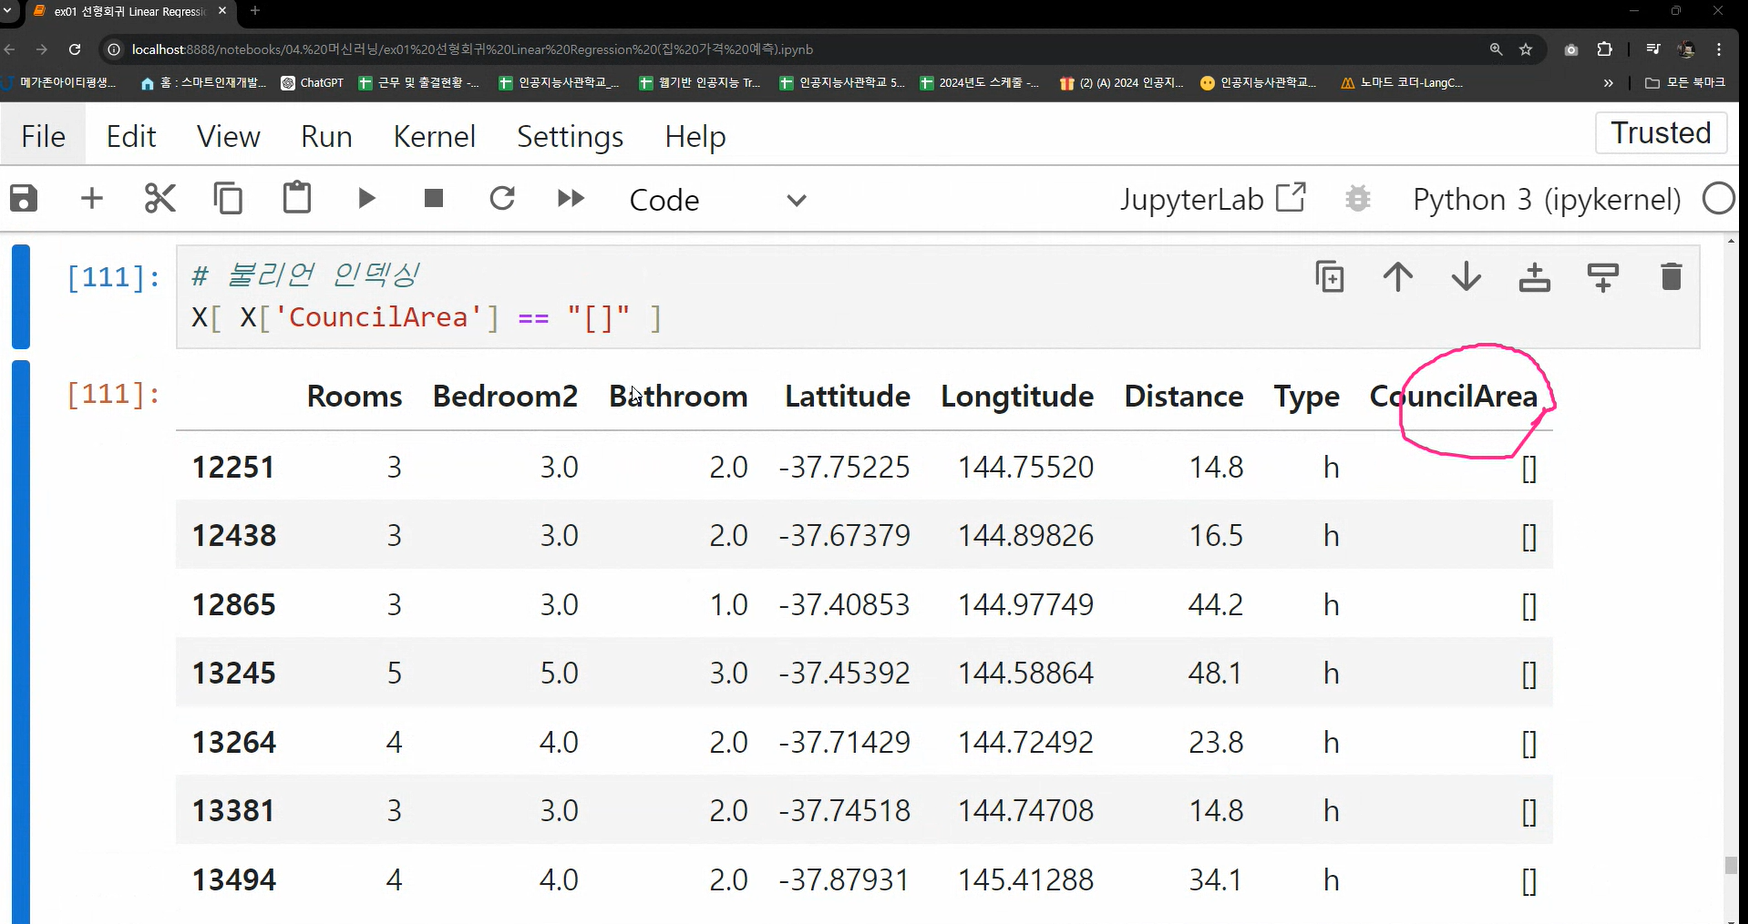

In [64]:
X.drop(arr.index , inplace = True)
y.drop(arr.index, inplace = True)

# 자: 쌤이랑 달랐음 -> 위에  moreland fillna 하는 코드 inplace 지움


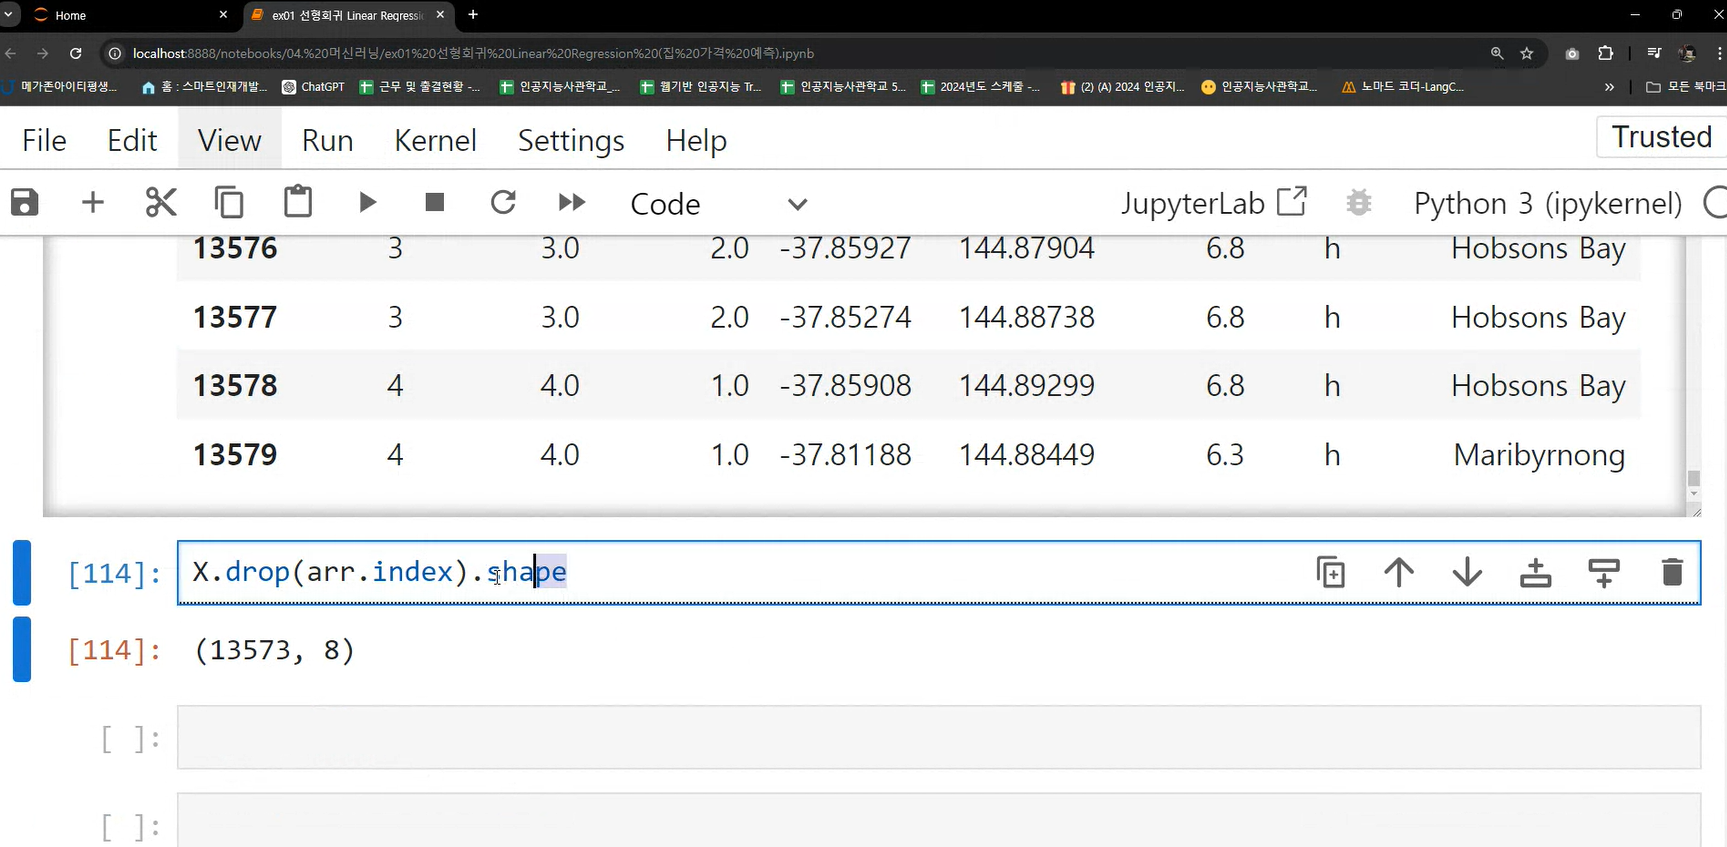

In [66]:
X.shape, y.shape # ((13573, 8), (13573,))

((13573, 8), (13573,))

In [68]:
# 원핫인코딩(one hot encoding) : 0과 1만을 이용해 데이터를 나타내는 방법
X_one_hot = pd.get_dummies(X, dtype='int64')

In [70]:
X_one_hot

,Rooms,Bedroom2,Bathroom,Lattitude,Longtitude,Distance,Type_h,Type_t,Type_u,CouncilArea_Banyule,...,CouncilArea_Moreland,CouncilArea_Nillumbik,CouncilArea_Port Phillip,CouncilArea_Stonnington,CouncilArea_Unavailable,CouncilArea_Whitehorse,CouncilArea_Whittlesea,CouncilArea_Wyndham,CouncilArea_Yarra,CouncilArea_Yarra Ranges
0,2,2.0,1.0,-37.79960,144.99840,2.5,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2,2.0,1.0,-37.80790,144.99340,2.5,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,3,3.0,2.0,-37.80930,144.99440,2.5,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,3,3.0,2.0,-37.79690,144.99690,2.5,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,4,3.0,1.0,-37.80720,144.99410,2.5,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,4,4.0,2.0,-37.90562,145.16761,16.7,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13576,3,3.0,2.0,-37.85927,144.87904,6.8,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13577,3,3.0,2.0,-37.85274,144.88738,6.8,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13578,4,4.0,1.0,-37.85908,144.89299,6.8,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
X_one_hot.shape # (13573, 42)

(13573, 42)

In [74]:
# 240819(월) (2)

In [84]:
# 훈련용, 평가용 데이터 분리
# 자영풀이
X_train , X_test, y_train , y_test = train_test_split(X_one_hot, y,
                                                    test_size = 0.3, random_state = 428)

# X_train, X_test, y_train, y_test = train_test_split(X, y, 
#                                                    test_size = 0.3, random_state = 15)

In [94]:
# 데이터 크기 확인
X_train.shape ,y_train.shape # ((9501, 42), (9501,))
# train의 문제, 답 수
# train과 test의 특성 수가 같은지

((9501, 42), (9501,))

In [96]:
X_test.shape, y_test.shape # ((4072, 42), (4072,))

((4072, 42), (4072,))

#### 모델 학습
- 선형 회귀 모델

In [101]:
# 모델 생성
from sklearn.linear_model import LinearRegression
house_model_linear = LinearRegression() # 선형 회귀 모델

In [105]:
# 모델학습 - fit(훈련용 문제 ,훈련용 답)
house_model_linear.fit(X_train, y_train)

LinearRegression()

In [113]:
# 가중치, 절편 확인
# 선형함수 : y= wx + b
print('가중치 : ', house_model_linear.coef_) # 가중치, 기울기, coefficient
# 가중치 :  [  158006.479724      33905.58489078   177376.29683961 -1824786.41493385
#   -403273.40107102   -35175.88539374   293860.44338057   -49885.45928224
#   -243974.98409829     7036.14581805   374922.41859947   465444.93400565
#   -423911.52403848   211809.64884693  -181207.35315119   -31125.0296432
#   -133510.45686178     5288.40942276  -179115.40419683  -270858.01002481
#   -132900.20058148  -127058.80638979  -103870.88087589   926911.13171621
#    119444.53841026  -337432.54399052   154030.16350777   -58414.56369614
#   -311882.78448325    -6201.68953886   -96835.71889754   133437.20742809
#   -144225.79085482     9588.51290699   104172.3460522    252755.03053555
#     96108.57264761   177135.4027645     -3291.00381721  -785072.48823251
#     -7234.26183829   296064.0484505 ]

print('절편 : ', house_model_linear.intercept_) # 절편, 편향
# 절편 :  -10076788.713509861

가중치 :  [  158006.479724      33905.58489078   177376.29683961 -1824786.41493385
  -403273.40107102   -35175.88539374   293860.44338057   -49885.45928224
  -243974.98409829     7036.14581805   374922.41859947   465444.93400565
  -423911.52403848   211809.64884693  -181207.35315119   -31125.0296432
  -133510.45686178     5288.40942276  -179115.40419683  -270858.01002481
  -132900.20058148  -127058.80638979  -103870.88087589   926911.13171621
   119444.53841026  -337432.54399052   154030.16350777   -58414.56369614
  -311882.78448325    -6201.68953886   -96835.71889754   133437.20742809
  -144225.79085482     9588.51290699   104172.3460522    252755.03053555
    96108.57264761   177135.4027645     -3291.00381721  -785072.48823251
    -7234.26183829   296064.0484505 ]
절편 :  -10076788.713509861


In [117]:
# 모델 평가
# score로 점수내주기 - R2score
print("Linear score : ", house_model_linear.score(X_test, y_test)) # Linear score :  0.5945161988211909

Linear score :  0.5945161988211909


In [119]:
# 평가지표
from sklearn.metrics import mean_squared_error
# metrics : 평가지표모음

In [135]:
linear_pre_test = house_model_linear.predict(X_test)
mean_squared_error(linear_pre_test, y_test) # 예측값과 실제값 차이를 계산 
# 175439251580.29095
# 자 : 오차가 큰 편 ->컬럼  
# 제곱값 - 실제 오차에 제곱되어 있어서 한 번에 가늠하기 어려움

175439251580.29095

In [137]:
# 제곱값에 제곱근 씌우는 계산 - 실제 단위 가늠할 수 있도록
mean_squared_error(linear_pre_test, y_test) ** 0.5 # 418854.6902928162

418854.6902928162